# 중고나라 핸드폰 거래가격 예측하기
## 탐색적 분석 : 중고나라 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### [중고나라 데이터셋 살펴보기]

In [2]:
df = pd.read_csv("./used_mobile_phone.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None


,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


### [개별 피처 탐색하기]

In [3]:
# create_date로부터 '월'을 의미하는 month 정보를 피처로 추출
df['month'] = df['create_date'].apply(lambda x : x[:7])

# 월별 거래 횟수를 계산하여 출력
df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

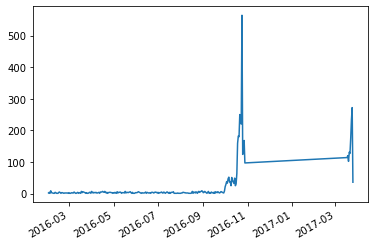

In [6]:
# 일별 거래 횟수를 계산하여 그래프로 출력
df_day = pd.to_datetime(df['create_date'].apply(lambda x : x[:10])).value_counts()
df_day.plot()
plt.show()

가격 피처 탐색

<AxesSubplot:>

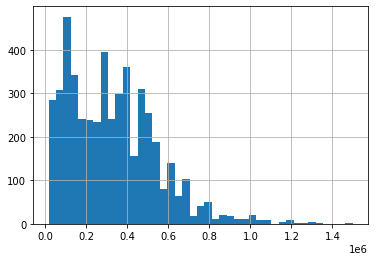

In [7]:
# 가격의 분포를 그래프로 탐색
df['price'].hist(bins='auto')

In [8]:
# 핸드폰 기종별 가격의 평균과 표준편차를 계산
df_price_model_mean = df.groupby('phone_model')['price'].transform(lambda x : np.mean(x))
df_price_model_std = df.groupby('phone_model')['price'].transform(lambda x : np.std(x))

In [20]:
df_price_model_mean

0       4.545240e+05
1       2.972500e+05
2       2.346903e+05
3       3.300745e+05
4       1.279354e+05
            ...     
4946    1.067273e+06
4947    1.072353e+06
4948    1.072353e+06
4949    1.067273e+06
4950    8.010000e+05
Name: price, Length: 4951, dtype: float64

<AxesSubplot:>

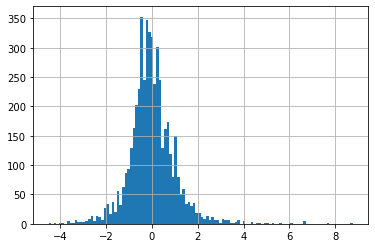

In [12]:
# 이를 바탕으로 모든 데이터의 z-score를 계산한다. 이는 해당 데이터의 가격이 기종별 평균에 비해 어느정도로 높거나 낮은지를 알 수 있게 해준다.
df_price_model_z_score = (df['price'] - df_price_model_mean) / df_price_model_std
df_price_model_z_score.hist(bins='auto')

출고가 피처 탐색

<AxesSubplot:>

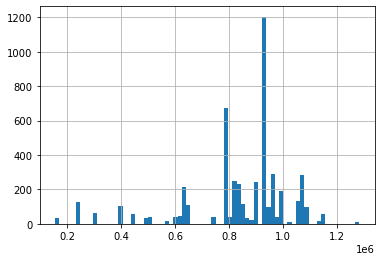

In [22]:
# factory_price 피처의 분포를 탐색한다.
df['factory_price'].hist(bins='auto')

<AxesSubplot:xlabel='factory_price', ylabel='price'>

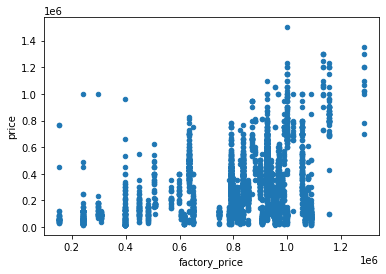

In [23]:
# factory_price와 price 피처를 scatter로 출력하여, 상관관계 파악
df.plot.scatter(x='factory_price', y='price')

핸드폰 모델 피처 탐색

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x221a01ce520>,
 'caps': [<matplotlib.lines.Line2D at 0x221a01ceac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x221a01ce250>],
 'medians': [<matplotlib.lines.Line2D at 0x221a01d90a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x221a01d9370>],
 'means': []}

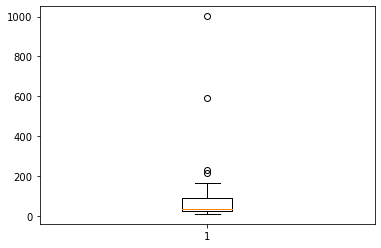

In [25]:
# 기종별 총 거래 데이터 개수 집계
model_counts = df['phone_model'].value_counts()
print(model_counts.describe())

# 기종별 총 거래 데이터 개수를 상자 그림으로 살펴보기
plt.boxplot(model_counts)

메이커 피처 탐색

apple      2450
samsung    1642
lg          677
pantech      57
sony         37
huawei       35
tg           28
sky          25
Name: maker, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x221a044cf40>,
 'caps': [<matplotlib.lines.Line2D at 0x221a046f520>,
 'boxes': [<matplotlib.lines.Line2D at 0x221a044cc40>],
 'medians': [<matplotlib.lines.Line2D at 0x221a046fac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x221a046fd90>],
 'means': []}

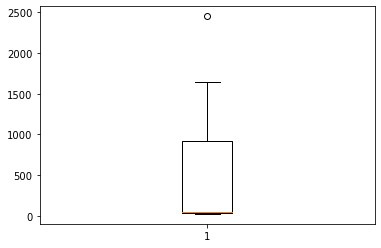

In [26]:
maker_counts = df['maker'].value_counts()
print(maker_counts)
plt.boxplot(maker_counts)

물가 피처 탐색

In [27]:
df['price_index'].value_counts()

103.05    3061
95.96     1311
102.59     448
94.90      131
Name: price_index, dtype: int64

---

### [Random Forest Regressor 를 이용한 가격 예측]

In [28]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,month
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04


Random Forest 모델 학습

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 학습 / 테스트용 데이터로 분리
df = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 'month']]
df = pd.get_dummies(df, columns=['phone_model','maker','month'])
x = df.loc[:, df.columns != 'price']
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=112)

# 랜덤 포레스트 모델을 학습
forest = RandomForestRegressor(n_estimators=1000, criterion='mse')
forest.fit(x_train, y_train)
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)

# 학습한 모델을 평가
print('MSE train : %.3f, test: %.3f'%(
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_test, y_test_pred)))
print('R2 train : %.3f, test: %.3f'%(
                    r2_score(y_train, y_train_pred),
                    r2_score(y_test, y_test_pred)))

C:\Users\rladl\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


MSE train : 10840032720.254, test: 13368088297.805
R2 train : 0.766, test: 0.726


피처 중요도 분석

[('factory_price', 0.40240387708510933),
 ('maker_apple', 0.28707574794029095),
 ('phone_model_iphone se 64gb', 0.025601350371208673),
 ('price_index', 0.02050255754883181),
 ('month_2017-03', 0.01906613613043591),
 ('phone_model_galaxy s4 32gb', 0.018907948701266674),
 ('phone_model_galaxy s3 3g 8gb', 0.018801870396977),
 ('phone_model_galaxy s7 edge 32gb', 0.017410091641576038),
 ('maker_samsung', 0.01585352326945013),
 ('phone_model_galaxy s6 32gb', 0.011876612421373589)]

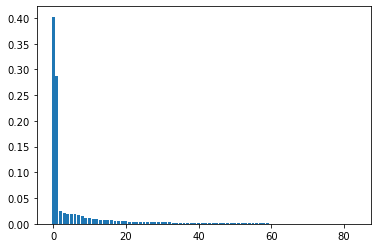

In [33]:
# 학습한 모델의 피처 중요도를 그래프로 살펴보기
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(x.shape[1]), importances[indices])

# 학습한 모델의 피처 중요도를 출력
feat_labels = x.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

In [36]:
feature = list(zip(feat_labels, forest.feature_importances_))
print(feature[:10])

[('factory_price', 0.40240387708510933), ('price_index', 0.02050255754883181), ('phone_model_g pro2 32gb', 0.000572976844160511), ('phone_model_g3 cat.6 32gb', 0.00048054439462477975), ('phone_model_g4 32gb', 0.00039295316042170893), ('phone_model_galaxy a7 2016 16gb', 0.0032818579099652286), ('phone_model_galaxy a8 2016 32gb', 0.0013574594524360791), ('phone_model_galaxy alpha 32gb', 4.534783624324407e-05), ('phone_model_galaxy folder 8gb', 0.0016518921625825866), ('phone_model_galaxy grand max 16gb', 0.00011358816628313578)]


In [38]:
# month 피처 중, 영향력이 높은 순으로 정렬하여 출력
for sorted_feature in sorted(feature, key=lambda tup : tup[1], reverse=True) :
    if 'month' in sorted_feature[0]:
        print(sorted_feature)

('month_2017-03', 0.01906613613043591)
('month_2016-05', 0.011799050146363581)
('month_2016-09', 0.00894327597179199)
('month_2016-10', 0.006892968225874244)
('month_2016-06', 0.003125073634060487)
('month_2016-04', 0.0029560247894852725)
('month_2016-08', 0.002590309750146451)
('month_2016-07', 0.0025479111632455147)
('month_2016-03', 0.0024915481827031917)
('month_2016-02', 0.0008537935918050845)


예측 결과 scatter plot

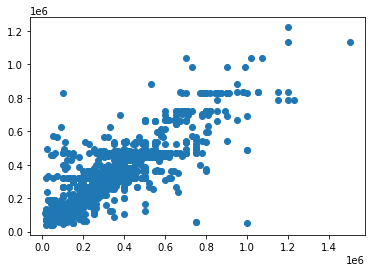

In [39]:
plt.scatter(y_test.values, y_test_pred)

## 피처 엔지니어링 : 예측 모델 개선

In [40]:
# 데이터 다시 불러오기
df = pd.read_csv('./used_mobile_phone.csv')
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


create_date로 시간점수 생성하기

In [41]:
from datetime import datetime
import time

# create_date 피처를 수치적으로 계산하기 위해, unixtime으로 변환하는 함수를 정의
def date_to_unixtime(date_str):
    timestamp = time.mktime(datetime.strptime(date_str, '%Y-%m-%d').timetuple())
    return timestamp

# create_date 피처를 ‘현재와 얼마나 가까운 데이터인 지’ 판단하기 위한 점수를 생성합니다. 먼저 unixtime으로 데이터를 변환합니다.
df['create_unixtime'] = df['create_date'].apply(lambda x: date_to_unixtime(x[:10]))
print(df['create_unixtime'][:10])

0    1.489849e+09
1    1.477408e+09
2    1.477321e+09
3    1.490195e+09
4    1.460300e+09
5    1.490108e+09
6    1.490195e+09
7    1.475766e+09
8    1.490368e+09
9    1.458659e+09
Name: create_unixtime, dtype: float64


In [42]:
# 변환된 unixtime에 min_max 스케일링을 적용
df['create_time_score'] = (df['create_unixtime'] - df['create_unixtime'].min() ) / \
                            (df['create_unixtime'].max() - df['create_unixtime'].min())
df[['create_date', 'create_unixtime', 'create_time_score']].head()

,create_date,create_unixtime,create_time_score
0,2017-03-19 4 35 00 PM,1.489849e+09,0.985612
1,2016-10-26 12 08 00 PM,1.477408e+09,0.640288
2,2016-10-25 12 52 00 PM,1.477321e+09,0.637890
3,2017-03-23 11 14 00 PM,1.490195e+09,0.995204
4,2016-04-11 7 35 00 PM,1.460300e+09,0.165468


phone_model 피처 분리

In [43]:
# phone_model 피처에서 저장 용량[phone_model_storage] 피처를 추출
df['phone_model_storage'] = df['phone_model'].apply(lambda x: x.split(" ")[-1])

# phone_model 피처에서 기종 세부명 피처를 추출
df['phone_model_detail'] = df['phone_model'].apply(lambda x: ' '.join(x.split(" ")[:-1]))
df[['phone_model_storage', 'phone_model_detail']].head()

,phone_model_storage,phone_model_detail
0,64gb,iphone 6
1,32gb,galaxy s6 edge
2,32gb,galaxy s6
3,32gb,lg g5
4,32gb,lg u


{'whiskers': [<matplotlib.lines.Line2D at 0x221adf7f9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x221adf7ff40>,
 'boxes': [<matplotlib.lines.Line2D at 0x221adf7f6d0>,
 'medians': [<matplotlib.lines.Line2D at 0x221adf85520>,
 'fliers': [<matplotlib.lines.Line2D at 0x221adf857f0>,
 'means': []}

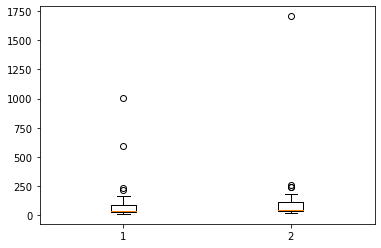

In [49]:
# phone_model 피처의 기종별 거래 데이터 개수를 집계
model_counts = df['phone_model'].value_counts()

# phone_model_detail 피처의 기종별 거래 데이터 개수를 집계
model_detail_counts = df['phone_model_detail'].value_counts()
data = [model_counts, model_detail_counts]

# 두 피처간의 기종별 거래 데이터 개수 비교
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.boxplot(data)

phone_model 관련 딕셔너리 생성

In [54]:
# 기종명 + 용량으로 출고가를 찾기 위한 딕셔너리를 생성
model_to_factory_price_dict = {}
for index, row in df.iterrows():
    model_concat = (row['phone_model_detail'], row['phone_model_storage'])
    if model_concat in model_to_factory_price_dict:
        pass
    else :
        model_to_factory_price_dict[model_concat] = row['factory_price']

print(str(model_to_factory_price_dict)[:40], "...")

{('iphone 6', '64gb'): 924000, ('galaxy  ...


### [감성 분석으로 물품의 상태 분류하기]
감성분류의 정답 데이터셋 생성

-1.3966616903783426
1.666982156397844


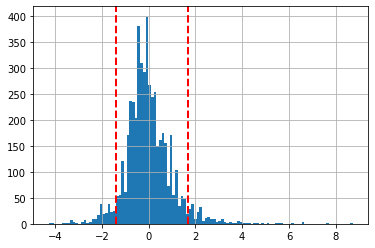

In [55]:
# 거래 가격(price)의 z-score를 계산합니다. 이는 해당 데이터의 가격이 기종의 평균에 비해 어느정도로 높거나 낮은지를 알 수 있게 하는 점수입니다.
df['price_by_group'] = df.groupby('phone_model_detail')['price'].transform(lambda x: (x - x.mean()) / x.std())

# 거래 가격의 z-score(price_by_group)의 분포를 그래프로 출력합니다
ax = df['price_by_group'].hist(bins="auto")

# z-score(price_by_group) 기준으로 하위 5%, 상위 5%에 해당하는 점수를 lower_bound, upper_bound 라고 지정합니다.
lower_bound = df['price_by_group'].quantile(0.05)
upper_bound = df['price_by_group'].quantile(0.95)

# lower_bound, upper_bound 그래프에 추가합니다.
ax.axvline(x=lower_bound, color='r', linestyle='dashed', linewidth=2)
ax.axvline(x=upper_bound, color='r', linestyle='dashed', linewidth=2)

# lower_bound를, upper_bound 출력합니다.
print(lower_bound)
print(upper_bound)

In [56]:
# lower_bound 보다 낮으면 0 , upper_bound보다 높으면 2, 그 중간이면 1로 가격의 상태를 분류하는 함수를 정의
def get_price_level(price, lower, upper):
    if price <= lower:
        return '0'
    elif price >= upper :
        return '2'
    else :
        return '1'

# lower_bound 보다 낮으면 0 , upper_bound보다 높으면 2, 그 중간이면 1로 가격의 상태를 분류
df['price_lower'] = df.groupby('phone_model_detail')['price'].transform(lambda x : x.quantile(0.05))
df['price_upper'] = df.groupby('phone_model_detail')['price'].transform(lambda x : x.quantile(0.95))
df['price_level'] = df.apply(lambda row : get_price_level(row['price'], row['price_lower'], row['price_upper']), axis=1)
df[['price', 'price_lower', 'price_upper', 'price_level', 'text']].head()

,price,price_lower,price_upper,price_level,text
0,550000.0,180000.0,680000.0,1,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...
1,380000.0,180000.0,414000.0,1,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...
2,300000.0,150000.0,349000.0,1,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...
3,290000.0,100000.0,500000.0,1,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...
4,280000.0,18000.0,400000.0,1,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...


---

텍스트 전처리

In [61]:
import pickle
import re

with open('./used_mobile_phone_stopwords.pkl','rb') as f :
    stopwords = pickle.load(f)

# 불용어 사전에 등록된 단어 10개를 출력
print(stopwords[:10])

['거래', '입니', '판매', '아이폰', '갤럭시', '골드', '팝', '만원', '폰', '시']


형태소 단위 추출

In [62]:
from konlpy.tag import Okt

# '+'를 제외한 특수문자를 제거하고, 숫자형태의 문자를 제거
def text_cleaning(text):
    text = ''.join(c for c in text if c.isalnum() or c in '+, ') # isalnum() 영어,한글,숫자이면 참, 아니면 거짓
    text = ''.join([i for i in text if not i.isdigit()])
    return text

def get_pos(x):
    tagger = Okt()
    poses = tagger.pos(x) # 형태소 분류를 하면서 품사도 붙여줌 ex ('대한민국', 'N')
    return [pos[0] for pos in poses if pos[0] not in stopwords]

# 위 함수들을 적용한 형태소 추출을 테스트
df['text'] = df['text'].apply(lambda x: text_cleaning(x))
result = get_pos(df['text'][0])
print(result)

['+', '애플', '라이트', '팝니다', '+', '애플', '라이트', '팝니다', '+', '애플', '라이트', '팝니다', '리퍼', '기간', '만료', '되어서', '징', '하게', '되었습니다', '상태', '초', 'a', '급', '스', '없습니다', '+', '애플', '라이트', '팝니다', '+', '애플', '라이트', '팝니다', '리퍼', '기간', '만료', '되어서', '징', '하게', '되었습니다', '상태', '초', 'a', '급', '스', '없습니다', '징', '애플', '라이트', '홈', '버튼', '링', '카메라', '링', '볼륨', '버튼', '슬립', '버튼', '검금', '심플', '튀지', '않게', '이쁘게', '했구요', '유심', '꽂고', '바로', '사용', '하시면', '됩니다', '사람', '이냐', '자주', '물어보고', '실제', '더욱', '이쁩니다', '밤', '영롱하게', '맥북', '뒷', '사과', '로고', '비춰지고', '요전', '넘어가기', '위해', '합니다', '가능합니다', '박스', '어머니', '버리시고', '이어폰', '충전기', '정품', '드립니다', '직거래', '우선', '순', '위로', '정', '싶으시면', '선', '입금', '택배', '발송', '해드리겠습니다', '믿으시면', '직거래', '하시길', '추천', '해요', '안전', '합니다', '서울시', '강남구', '역삼동', '차병원', '사거리', '근처', '가격']


빈출 형태소 3000개 선정

In [64]:
from collections import Counter

# get_pos 함수를 모든 텍스트 데이터 적용하여 형태소 말뭉치를 추출
corpus = sum(df['text'].apply(lambda x: get_pos(x)).tolist(), [])

# 추출된 형태소 말뭉치에서 가장 많이 등장한 형태소 2500개를 추출
counter = Counter(corpus)
common_words = [key for key, _ in counter.most_common(2500)]
common_words

['입니다',
 '직거래',
 's',
 '합니다',
 '택배',
 '사용',
 '급',
 '상태',
 '팝니다',
 '가능합니다',
 '정상',
 '사진',
 '가격',
 '+',
 '케이스',
 'a',
 '주세요',
 '해지',
 '삭제',
 '제품',
 '있습니다',
 '박스',
 '가능',
 '직접',
 '액정',
 '배터리',
 '성품',
 '필름',
 '리퍼',
 '충전기',
 '없습니다',
 '풀',
 '개통',
 '유심',
 '즈',
 '안전',
 '스',
 '하기',
 '신청',
 '드립니다',
 '통신사',
 '구입',
 '약정',
 '이어폰',
 '공기',
 '새',
 '기변',
 '포함',
 '모델',
 '선택',
 '됩니다',
 '확인',
 '기간',
 '기스',
 '그레이',
 '찍힘',
 '방법',
 '바로',
 '할인',
 '제',
 '시기',
 '스페이스',
 '희망',
 '번호',
 '중고나라',
 '본체',
 '같이',
 '생활',
 '잘',
 '무',
 '퀵',
 '글',
 '된',
 '않을',
 '공식',
 '앱',
 '확정',
 '기능',
 '다운',
 '양',
 '호환',
 '케이블',
 '받기',
 '미',
 '이메일',
 '작성',
 '부분',
 '금지',
 '될수',
 '식아이디',
 '허위',
 '임의',
 '통보',
 '채우지',
 '핸드폰',
 '편한',
 '전혀',
 '충전',
 '내용',
 '연락처',
 '단말기',
 '부산',
 '대구',
 '미사',
 '정품',
 '중고',
 '문제',
 '없이',
 '이상',
 '보호',
 '방문',
 '없는',
 '외관',
 '외',
 '인천',
 '깨끗합니다',
 'x',
 '초기',
 '하나',
 '참고',
 '이구',
 '요금',
 '개월',
 '이나',
 '사이트',
 '팔아요',
 '하시면',
 '했습니다',
 '동',
 '카페',
 '보내',
 '카톡',
 '블로그',
 '링크',
 '싸이',
 '강퇴',
 '삼성',
 '거치',
 '있는',
 '호선'

In [89]:
my_list = [[7, 6], [5, 4], [1, 2, 3], ['a', 'b']]
print(my_list)

result = sum(my_list, [])
print(result)

[[7, 6], [5, 4], [1, 2, 3], ['a', 'b']]
[7, 6, 5, 4, 1, 2, 3, 'a', 'b']


TF-IDF 벡터 생성

In [90]:
df['price_level'].value_counts()

1    4296
0     334
2     321
Name: price_level, dtype: int64

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 빈출 형태소를 제외한 모든 형태소를 제거하는 함수를 정의합니다.
def get_common_pos(x):
    tagger = Okt()
    poses = tagger.pos(x)
    return [pos[0] for pos in poses if pos[0] in common_words]

# 1:3:1 비율로 랜덤 샘플링을 수행합니다.
negative_random = df[df['price_level']=='0'].sample(321, random_state=30)
neutral_random = df[df['price_level']=='1'].sample(321*3, random_state=30)
positive_random = df[df['price_level']=='2'].sample(321, random_state=30)

# 샘플링 완료된 데이터셋을 정의합니다.
df_sample = negative_random.append(neutral_random).append(positive_random)

# TF-IDF를 수행하여 피처를 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_common_pos(x))
X = index_vectorizer.fit_transform(df_sample['text'].tolist())

tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

# 감성 분류를 위한 학습 데이터셋을 정의합니다.
y = df_sample['price_level']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)
print(x_train.shape)
print(x_test.shape)

C:\Users\rladl\AppData\Local\Temp\ipykernel_20360\2653238649.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample = negative_random.append(neutral_random).append(positive_random)
C:\Users\rladl\AppData\Local\Temp\ipykernel_20360\2653238649.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sample = negative_random.append(neutral_random).append(positive_random)


(1284, 2476)
(321, 2476)


상품 상태 분류하기

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# 비선형 svm 분류 모델을 학습하고 평가
svm = SVC(kernel='rbf', C=10.0, random_state=112, gamma=0.10)
svm.fit(x_train, y_train)
y_pred_ksvc = svm.predict(x_test)
print('Accuracy: %.2f'%accuracy_score(y_test, y_pred_ksvc))

Accuracy: 0.77


In [94]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_ksvc)
print(confmat)

[[ 30  28   4]
 [ 10 181  10]
 [  2  21  35]]


## 중고폰 거래가 예측

### [Random Forest Regressor 재학습]

C:\Users\rladl\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


MSE train: 4774280757.495, test: 11028560987.919
R^2 train: 0.902, test: 0.748


[('maker_apple', 0.25370486876474396),
 ('factory_price', 0.2525846409546809),
 ('create_time_score', 0.11672731871547405),
 ('phone_model_storage_16gb', 0.06059865961892541),
 ('product_status_2', 0.04727524513663187),
 ('phone_model_detail_galaxy s7 edge', 0.02881977214708651),
 ('phone_model_storage_64gb', 0.02637225071989735),
 ('phone_model_detail_galaxy note5', 0.024640751407109186),
 ('phone_model_detail_galaxy s7', 0.022664693137229713),
 ('product_status_0', 0.021909156556602517)]

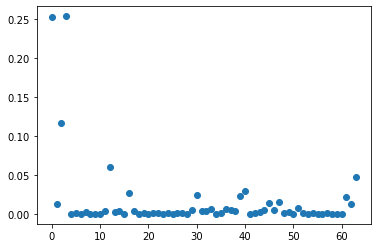

In [95]:
# text 피처로부터  '상품 상태 피처(product_status)' 를 생성합니다.
X = index_vectorizer.transform(df['text'].tolist())
X = tfidf_vectorizer.transform(X)
df['product_status'] = pd.Series(svm.predict(X))

# 랜덤 포레스트 모델 학습을 위한 데이터를 준비합니다.
df = df[['price', 'factory_price', 'maker', 'price_index', 'create_time_score', 'phone_model_storage',
                'phone_model_detail', 'product_status']]
df = pd.get_dummies(df, columns=['maker', 'phone_model_storage', 'phone_model_detail', 'product_status'])

# 학습/테스트 데이터를 분리합니다.
X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 랜덤 포레스트 모델을 학습하고 평가합니다.
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# 피처 중요도 plot을 출력합니다.
importances = forest.feature_importances_
plt.plot(importances, "o")

# 피처 중요도를 print로 출력합니다.
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

feature-index 관련 딕셔너리 생성

In [96]:
df.head()

,price,factory_price,price_index,create_time_score,maker_apple,maker_huawei,maker_lg,maker_pantech,maker_samsung,maker_sky,...,phone_model_detail_nexus 5x,phone_model_detail_optimus g,phone_model_detail_vega iron2,phone_model_detail_vega secret up,phone_model_detail_wine smart jazz,phone_model_detail_xperia z3,phone_model_detail_y6,product_status_0,product_status_1,product_status_2
0,550000.0,924000,95.96,0.985612,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,380000.0,979000,103.05,0.640288,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,300000.0,854000,103.05,0.637890,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,290000.0,836000,95.96,0.995204,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,280000.0,396000,102.59,0.165468,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
# 프로그램에서 입력값에 대한 피처를 찾기 위한 딕셔너리를 생성합니다.
col_to_index_dict = {}
for idx, col in enumerate(df.columns[1:]):
    col_to_index_dict[col] = idx
    
print(str(col_to_index_dict)[:40], "...")

{'factory_price': 0, 'price_index': 1, ' ...


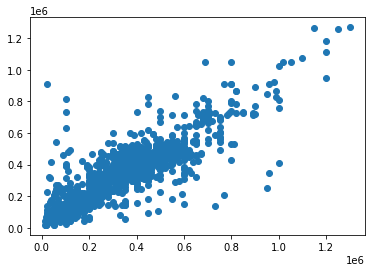

In [98]:
# 테스트 데이터의 y값과, 예측된 y값을 scatter plot을 활용하여 상관관계를 살펴봅니다.
plt.scatter(y_test.values, y_test_pred)

### [최적의 모델 파라미터 찾기]

In [99]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized Search로 찾아낼 파라미터 후보군을 각각 리스트로 선정합니다.
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]

# RandomizedSearchCV 오브젝트를 생성하여 모델을 정의합니다.
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
forest = RandomForestRegressor()
optimal_forest = RandomizedSearchCV(estimator = forest, 
                                    param_distributions = random_grid, 
                                    n_iter = 100, 
                                    cv = 3, 
                                    verbose=2,
                                    random_state=42, 
                                    n_jobs = -1)

# RandomizedSearchCV 모델을 학습합니다.
X = df.loc[:, df.columns != 'price']
y = df['price']
optimal_forest.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

최적의 파라미터

In [100]:
# 앞서 선정한 파라미터 후보군 중에서 가장 좋은 결과를 보인 파라미터의 조합을 출력합니다.
optimal_forest.best_params_

{'n_estimators': 2000,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

최적 모델 학습 결과

MSE train: 8808364398.645, test: 7645657692.042
R^2 train: 0.818, test: 0.825


[('factory_price', 0.29648802212586456),
 ('maker_apple', 0.2756146383272837),
 ('phone_model_storage_16gb', 0.0721457225897948),
 ('create_time_score', 0.06569692771819463),
 ('product_status_2', 0.06267472409718933),
 ('phone_model_detail_galaxy s7 edge', 0.027077101396300998),
 ('phone_model_detail_iphone 6', 0.025020390169501635),
 ('product_status_0', 0.02434176722064233),
 ('phone_model_detail_galaxy s4', 0.020530253312663713),
 ('product_status_1', 0.013872981253232611)]

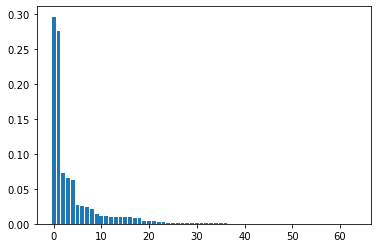

In [101]:
# 최적의 파라미터를 적용한 모델로 중고폰의 가격을 예측하고 평가합니다.
y_train_pred = optimal_forest.predict(X_train)
y_test_pred = optimal_forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# 가격 예측 모델의 피처 중요도 plot을 출력합니다.
importances = optimal_forest.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

# 가격 예측 모델의 피처 중요도를 출력합니다.
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, optimal_forest.best_estimator_.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

예측결과

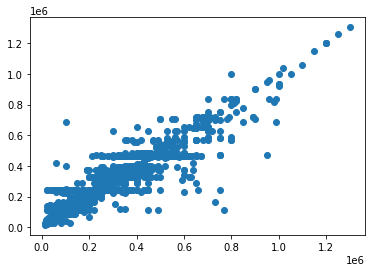

In [102]:
# 테스트 데이터의 y값과, 예측된 y값을 scatter plot을 활용하여 상관관계를 살펴봅니다.
plt.scatter(y_test.values, y_test_pred)